<a href="https://colab.research.google.com/github/mihir0804/Cognifyz_Technologies_DataScience_internship_task/blob/main/Data_Science_Internship_Report_Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

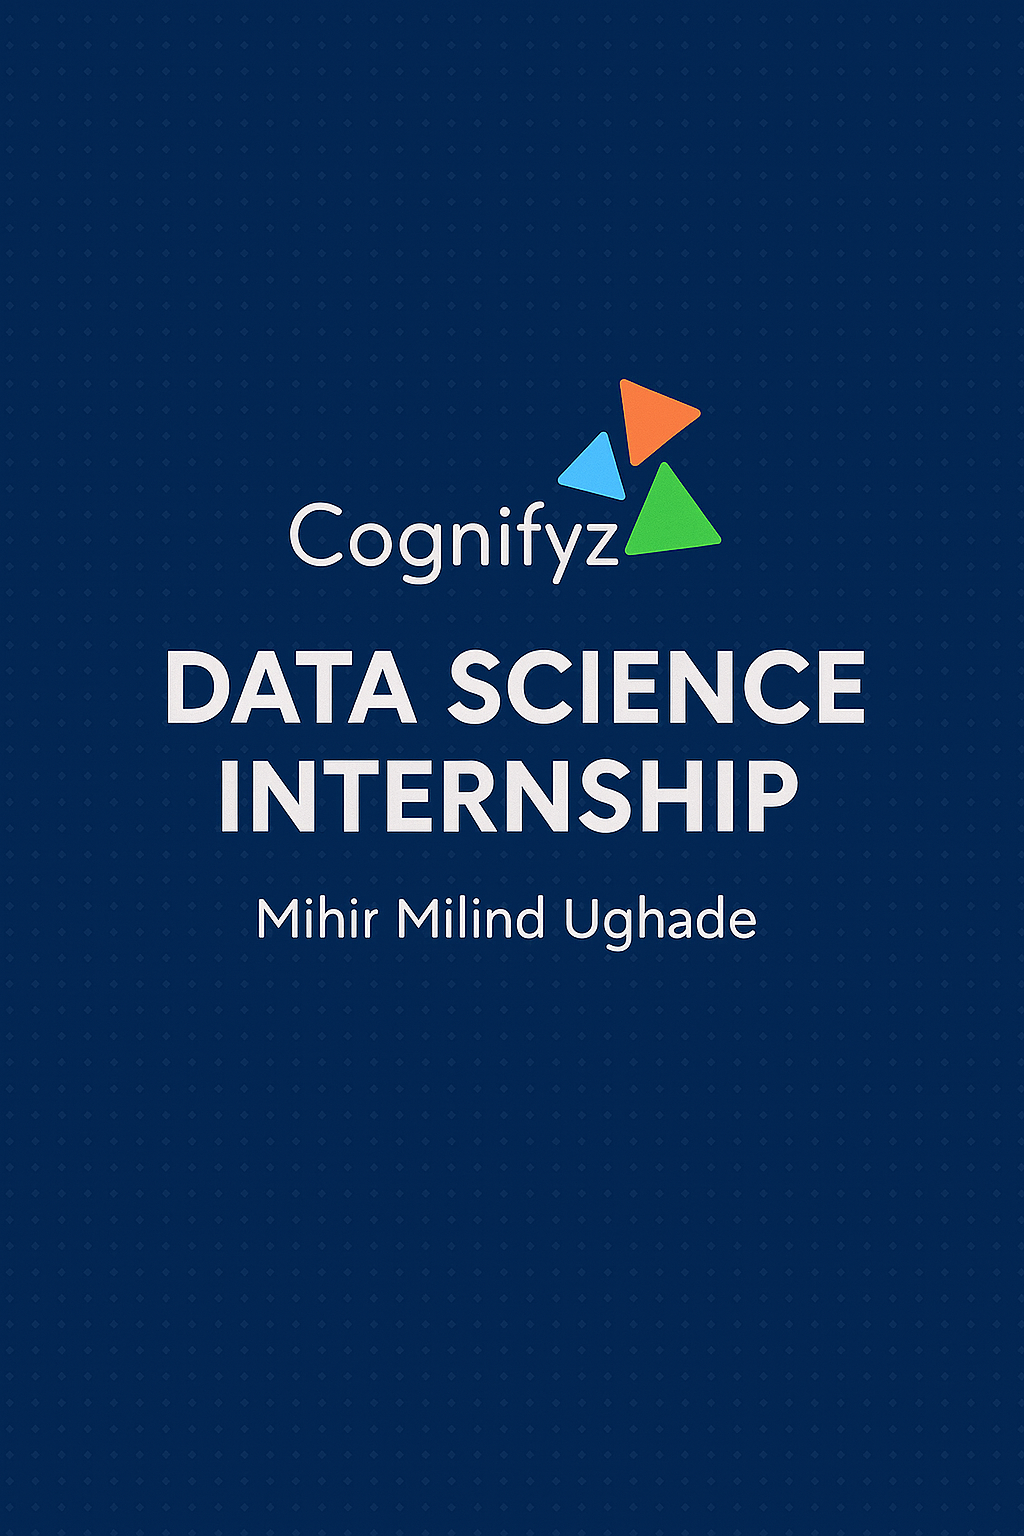

# **Cognifyz Technologies – Data Science Internship**

**Internship Domain:** Data Science  
**Intern Name:** Mihir Milind Ughade  
**Email:** mihirughade0804@gmail.com  
**LinkedIn:** [mihir-ughade-00601223a](https://www.linkedin.com/in/mihir-ughade-00601223a)  
**GitHub:** [mihir0804](https://github.com/mihir0804)


## **Objective**

**To analyze restaurant data and build predictive models to estimate the aggregate rating of restaurants using features like price range, delivery availability, votes, and more.
This notebook also explores business insights using data visualization techniques.**

# **Selected Levels & Tasks:-**

# **Level 1 – Task 1: Data Exploration & Preprocessing**
- **Dataset shape, column types**

- **Missing value handling**

- **Target (Aggregate rating) analysis**

- **Class imbalance visualized**



# **Level 2 – Task 2: Price Range Analysis**
- **Most common price range**

- **Average rating per price range**

- **Pie chart showing distribution**

- **Found top-rated pricing category**

# **Level 3 – Task 1: Predictive Modeling**
- **Data cleaning & encoding**

- **Built Linear, Decision Tree, Random Forest models**

- **Evaluated using MAE, RMSE, R²**

- **Visualized feature importance**

# **Level 3 – Task 3: Data Visualization**
- **Distribution of ratings**

- **Ratings by Cuisine and City**

- **Scatter plot: Votes vs Rating**

## **Tools Used**
- **Python**

- **Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learnn**

- **Jupyter Notebook**

In [1]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


In [2]:
# Load the dataset
df = pd.read_csv("/content/Dataset  (1).csv")

# View first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Column data types and non-null counts
df.info()

Shape of dataset: (9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   objec

In [5]:
# Total missing values per column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Combine into one table
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percent
})

missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

,Missing Values,Percentage
Cuisines,9,0.094231


In [6]:
# Check for potential object columns that should be numeric
df.dtypes

# Example: convert a column if necessary
# df['Some_Column'] = pd.to_numeric(df['Some_Column'], errors='coerce')

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


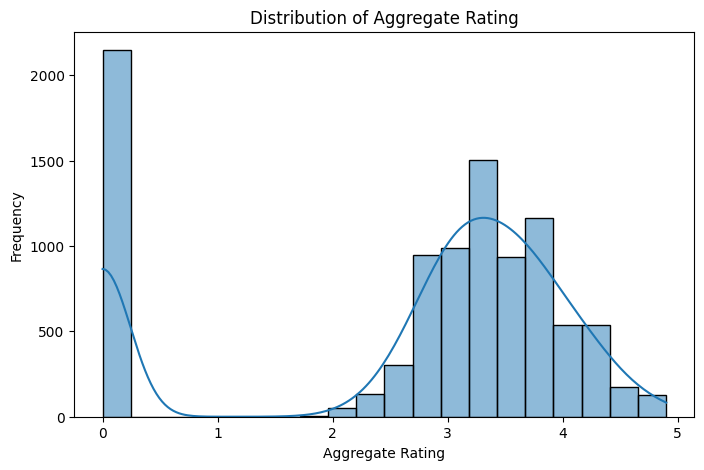

,count
Aggregate rating,
0.0,2148
1.8,1
1.9,2
2.0,7
2.1,15
2.2,27
2.3,47
2.4,87
2.5,110


In [7]:
# Plot distribution of Aggregate rating
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

# Value counts
df['Aggregate rating'].value_counts().sort_index()

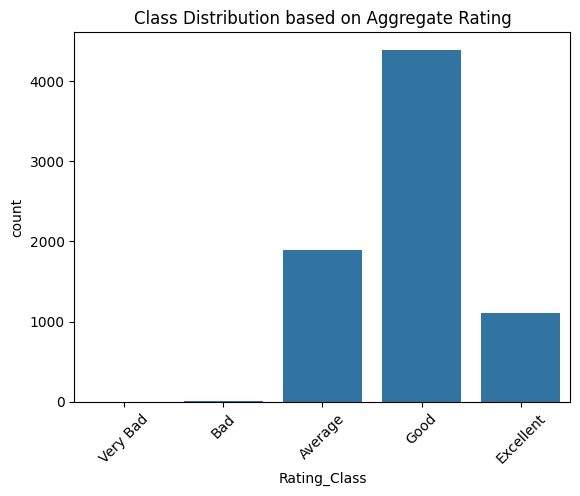

In [8]:
# Create class bins (optional)
df['Rating_Class'] = pd.cut(df['Aggregate rating'], bins=[0, 1, 2, 3, 4, 5],
                            labels=['Very Bad', 'Bad', 'Average', 'Good', 'Excellent'])

# Plot class imbalance
sns.countplot(x='Rating_Class', data=df)
plt.title("Class Distribution based on Aggregate Rating")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Calculate missing values and their percentages
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
Rating_Class,2148,22.489792
Cuisines,9,0.094231


In [10]:
# Drop rows where 'Cuisines' is missing
df_cleaned = df.dropna(subset=['Cuisines'])

# Confirm the shape after dropping
df_cleaned.shape

(9542, 22)

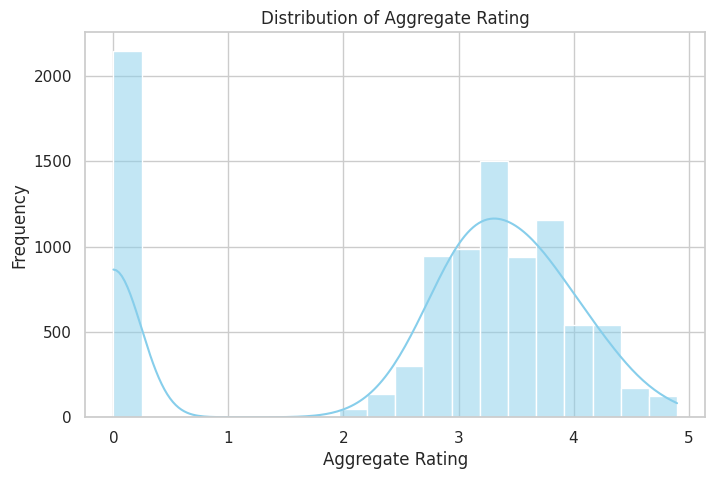

In [12]:
# Set style
sns.set(style="whitegrid")

# Plot histogram of Aggregate Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

In [13]:
df['Aggregate rating'].value_counts().sort_index()

,count
Aggregate rating,
0.0,2148
1.8,1
1.9,2
2.0,7
2.1,15
2.2,27
2.3,47
2.4,87
2.5,110


In [14]:
# Create custom bins for rating categories
df['Rating Class'] = pd.cut(
    df['Aggregate rating'],
    bins=[-0.1, 1, 2, 3, 4, 5],
    labels=['Very Bad', 'Bad', 'Average', 'Good', 'Excellent']
)

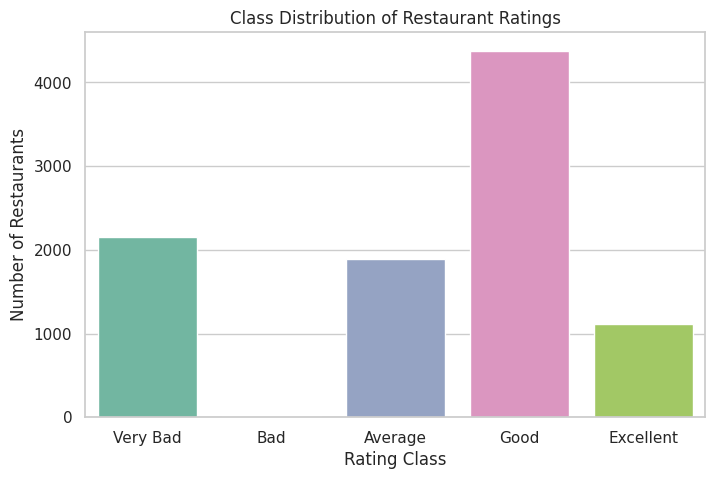

In [15]:
# Count plot for rating classes
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating Class', data=df, palette='Set2')
plt.title("Class Distribution of Restaurant Ratings")
plt.xlabel("Rating Class")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.show()

# **Level 2 - Task 2: Price Range Analysis**

## **OBJECTIVE:**
**Identify the most common price range**

**Calculate the average rating for each price range**

**Identify the rating color associated with the highest-rated price range**



In [16]:
# Count of restaurants in each price range
df['Price range'].value_counts().sort_index()

,count
Price range,
1,4438
2,3113
3,1405
4,586


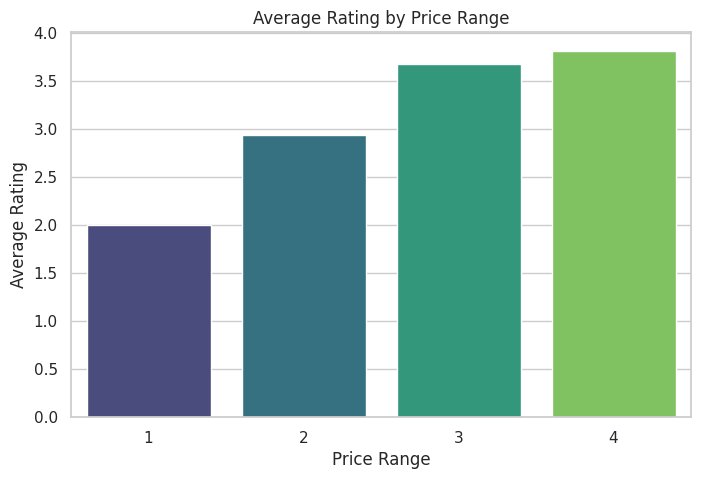

In [19]:
# Group by Price range and get average Aggregate rating
price_rating_avg = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Price range', y='Aggregate rating', data=price_rating_avg, palette='viridis')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

In [22]:
# Use a list for selecting multiple columns
price_color = df.groupby('Price range')[['Aggregate rating', 'Rating color']].first().reset_index()

# Sort by Aggregate rating to get the highest-rated price range
price_color = price_color.sort_values(by='Aggregate rating', ascending=False)

# Show top result
price_color.head(1)

,Price range,Aggregate rating,Rating color
2,3,4.8,Dark Green


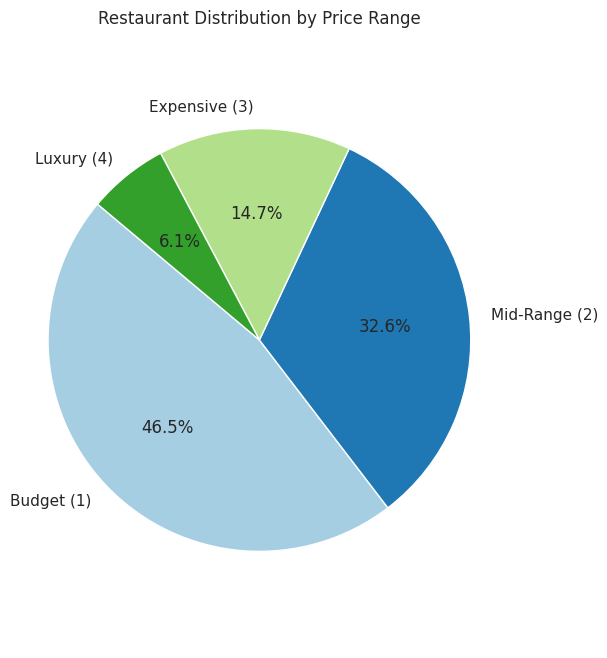

In [26]:
# Count number of restaurants per price range
price_counts = df['Price range'].value_counts().sort_index()

# Define custom labels (optional)
labels = ['Budget (1)', 'Mid-Range (2)', 'Expensive (3)', 'Luxury (4)']

# Plot pie chart
plt.figure(figsize=(6, 8))
plt.pie(price_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Restaurant Distribution by Price Range")
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()

# **Level 3 - Task 1: Predictive Modeling**

## **Data Preparation**

- **Select meaningful features (numerical + categorical)**

- **Convert categorical variables to numeric (label encoding or one-hot)**

- **Handle missing values (already done)**

## **Train-Test Split**

- **Divide data into training and testing sets (e.g., 80/20)**

## **Model Building**

- **Apply and compare multiple regression models:**

- **Linear Regression**

- **Decision Tree Regressor**

- **Random Forest Regressor**

## **Model Evaluation**

- **Use metrics like:**

- **MAE (Mean Absolute Error)**

- **MSE (Mean Squared Error)**

- **RMSE (Root Mean Squared Error)**

- **R² Score**

## **Feature Importance**

- **Identify which features most influence ratings (especially useful with tree models)**


## **Data Preprocessing & Feature Selection**

In [27]:
# Select features and target
features = ['Price range', 'Has Online delivery', 'Has Table booking', 'Votes', 'City', 'Cuisines']
target = 'Aggregate rating'

# Subset the data
df_model = df[features + [target]]

In [28]:
# Convert Yes/No to 1/0
df_model['Has Online delivery'] = df_model['Has Online delivery'].map({'Yes': 1, 'No': 0})
df_model['Has Table booking'] = df_model['Has Table booking'].map({'Yes': 1, 'No': 0})

In [29]:
# One-hot encode City and Cuisines
df_model = pd.get_dummies(df_model, columns=['City', 'Cuisines'], drop_first=True)

In [30]:
# Features and target split
X = df_model.drop(columns='Aggregate rating')
y = df_model['Aggregate rating']

In [31]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 {name}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


📊 Linear Regression
MAE: 1.1466
MSE: 1.9281
RMSE: 1.3886
R² Score: 0.1580

📊 Decision Tree
MAE: 0.2634
MSE: 0.1671
RMSE: 0.4088
R² Score: 0.9270

📊 Random Forest
MAE: 0.2144
MSE: 0.1074
RMSE: 0.3277
R² Score: 0.9531


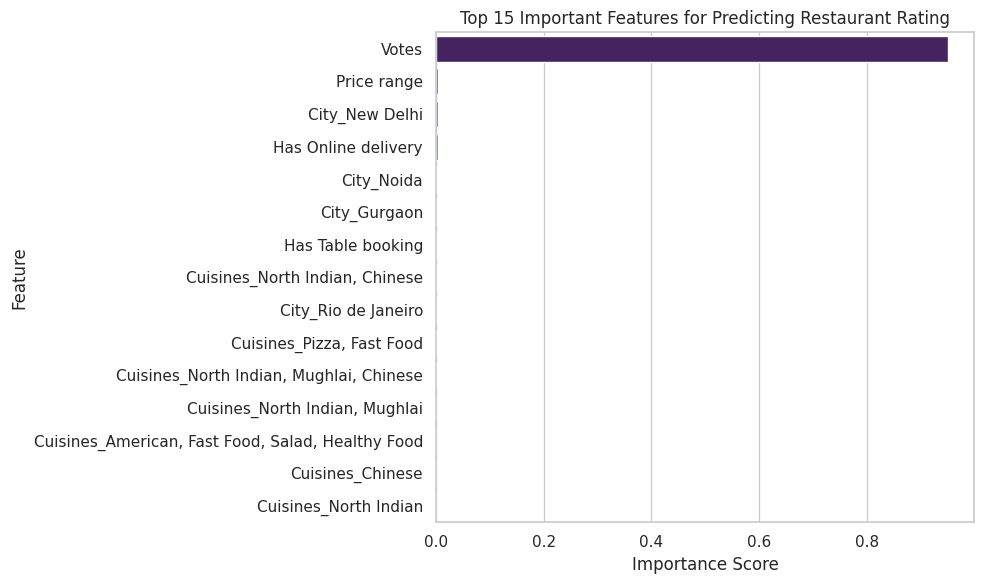

In [35]:
# Get feature importances from trained Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Create DataFrame for plotting
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Important Features for Predicting Restaurant Rating')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **Level 3 – Task 3: Data Visualization**

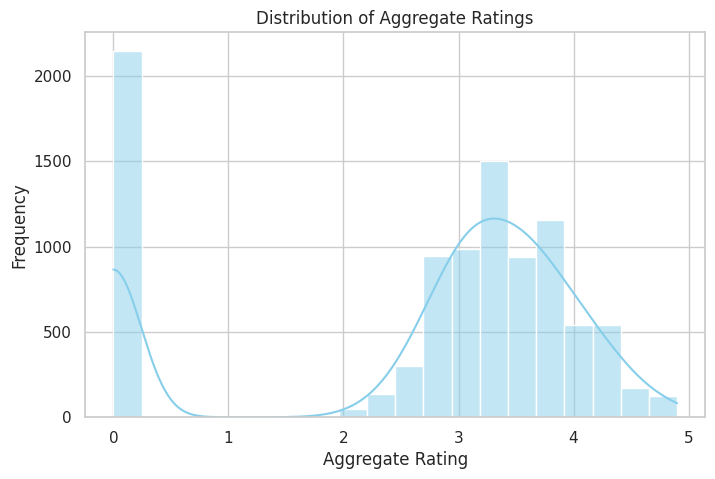

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

## **Average Ratings by Cuisine (Top 10 only)**

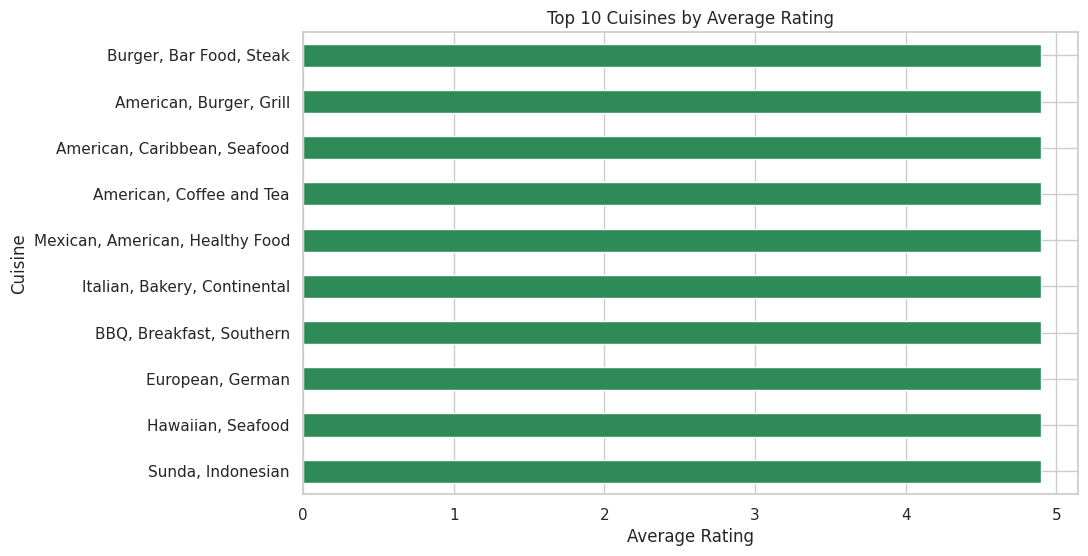

In [37]:
# Group and sort by mean rating
top_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='barh', color='seagreen')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()
plt.show()

## **Average Ratings by City (Top 10 cities)**

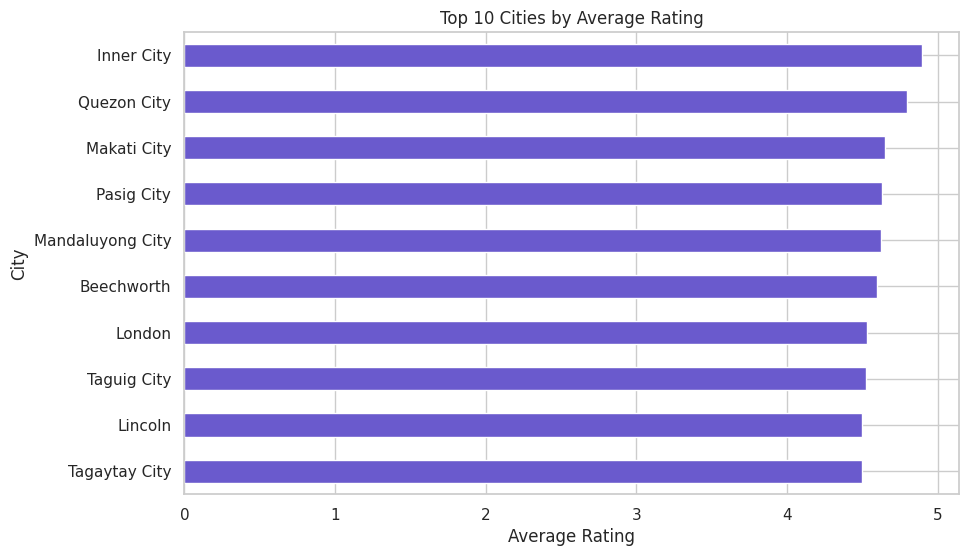

In [39]:
top_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='barh', color='slateblue')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.show()

## **Votes vs Aggregate Rating**

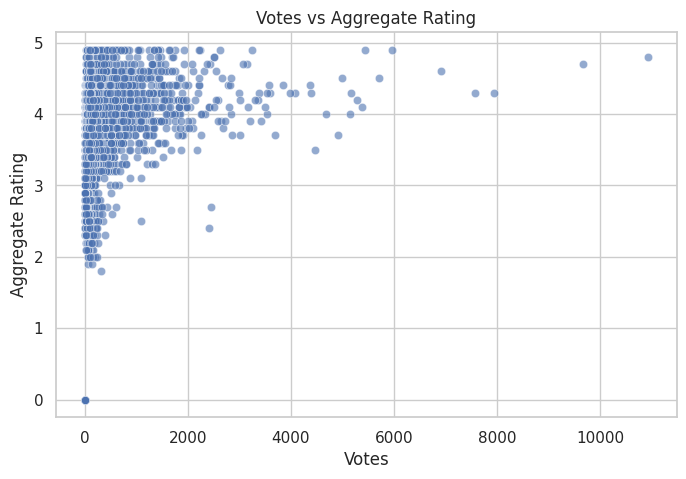

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()

# **Outcome**
- **Built and compared ML models to predict ratings**

- **Found actionable insights for business (e.g., impact of delivery, price, votes)**

- **Visualized key patterns for decision-making**

